In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import re
import collections
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

Input Analysis

What are the length distributions of documents and sentences? Any outliers?

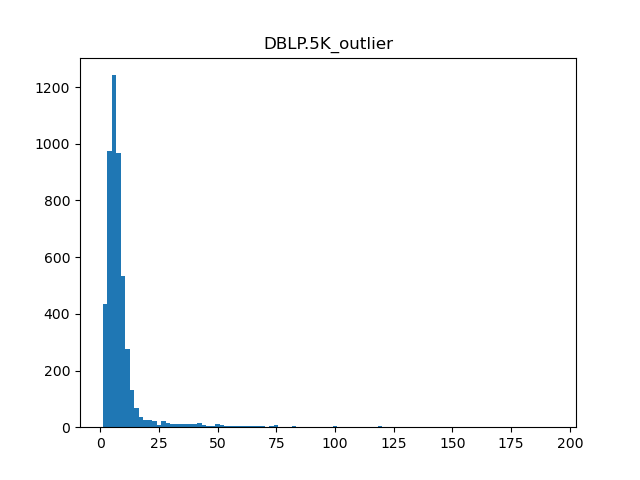

In [45]:
Image("../data/eda/outlier.png")

Boxplot Visual would give a better view of the length of documents.

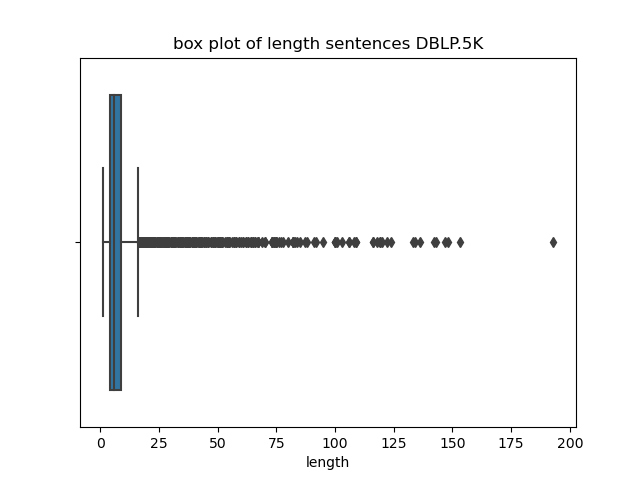

In [46]:
Image("../data/eda/boxplot.png")

After removing the outliers..

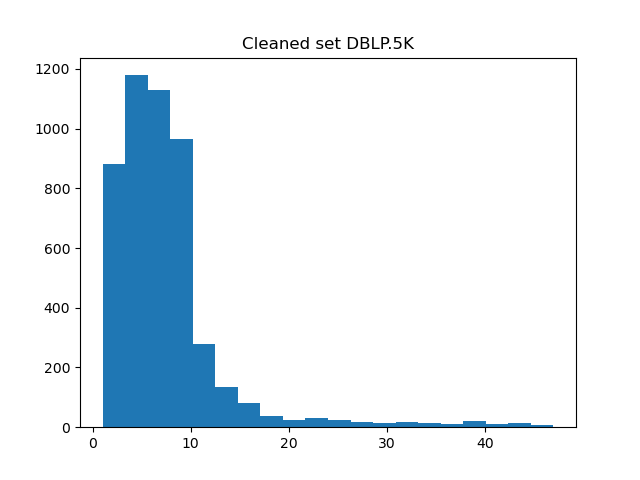

In [47]:
Image("../data/eda/cleaned_set.png")

What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

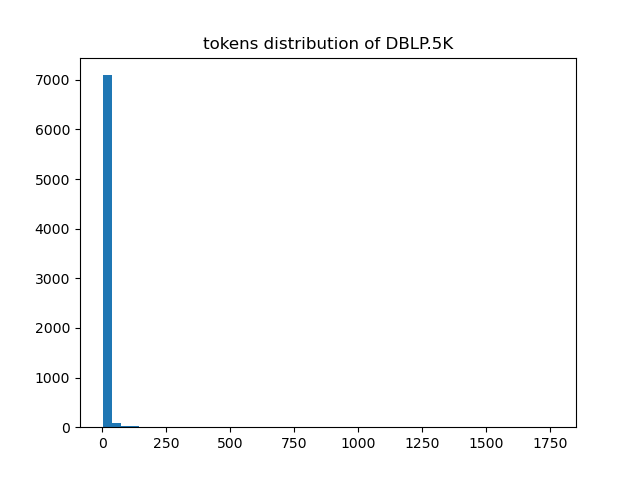

In [48]:
Image("../data/eda/tokens_distribution.png")

In [49]:
f = open("../data/eda/description.txt", "r")
print(f.read())

Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5912.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. 

Output Analysis

Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately.

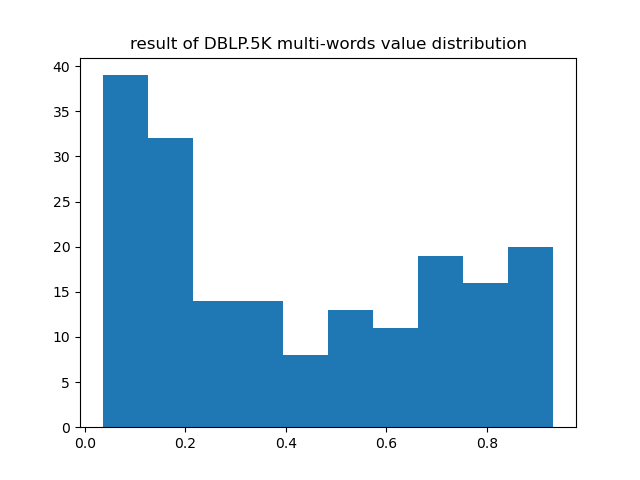

In [50]:
Image("../data/outputs/multi_value_distribution.png")

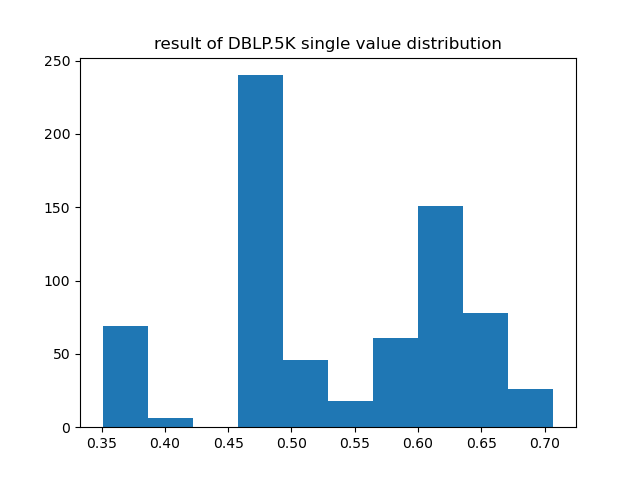

In [51]:
Image("../data/outputs/single_value_distribution.png")

We use the input text analyzing with TF-IDF and generate the word with corresponding quality values. After normalizing, we multiply the value with the Autophrase result and select the top 20 high quality phrases, which make the word cloud much more meaningful than only using the Autophrase itself only.

In [52]:
#tf-idf top 20 for single word
res = pd.read_csv('../data/outputs/tfidfsingle.csv')
res.head(20)

,Word,Score
0,data,1.000000
1,systems,0.993324
2,database,0.941626
3,based,0.678032
4,object,0.663834
5,3d,0.663436
6,databases,0.604709
7,information,0.558284
8,programming,0.544485
9,web,0.491320


In [53]:
#autophrase top 20 single
ds = pd.read_csv('../data/outputs/qualitysingle.csv')
ds.head(20)

,Score,Word
0,0.706986,programming
1,0.702598,range
2,0.700353,information
3,0.699432,approach
4,0.698407,design
5,0.698100,management
6,0.693038,database
7,0.690740,object
8,0.690491,analysis
9,0.686726,model


In [54]:
#multiplication top 20 single
mul = pd.read_csv('../data/outputs/multiplicationsingle.csv')
mul.head(20)

,Word,Score
0,data,0.674608
1,systems,0.671040
2,database,0.652582
3,object,0.458537
4,based,0.457512
5,databases,0.405466
6,information,0.390996
7,programming,0.384943
8,3d,0.368370
9,web,0.336352


In [55]:
#tf-idf top 20 multi
res = pd.read_csv('../data/outputs/tfidfmulti.csv')
res.head(20)

,Word,Score
0,object oriented,1.000000
1,database systems,0.889951
2,data mining,0.840483
3,information systems,0.469137
4,real time,0.416487
5,logic programming,0.410487
6,programming language,0.386242
7,oriented database,0.384824
8,query processing,0.351673
9,range images,0.336397


In [56]:
#autophrase top 20 multi
ds = pd.read_csv('../data/outputs/qualitymulti.csv')
ds.head(20)

,Score,Word
0,0.932020,programming language
1,0.924130,information retrieval
2,0.911978,relational database
3,0.910847,query language
4,0.909020,data mining
5,0.908570,concurrency control
6,0.905346,database design
7,0.902126,machine learning
8,0.900702,logic programming
9,0.896001,natural language


In [57]:
#multiplication top 20 multi
mul = pd.read_csv('../data/outputs/multiplicationmulti.csv')
mul.head(20)

,Word,Score
0,object oriented,0.893318
1,database systems,0.793622
2,data mining,0.764016
3,information systems,0.387188
4,logic programming,0.369727
5,programming language,0.359985
6,query processing,0.274652
7,knowledge discovery,0.268669
8,information retrieval,0.257967
9,range images,0.257451


In [59]:
#multiplication top 20 combined
final = pd.read_csv('../data/outputs/multiplicationall.csv')
final.head(40)

,Word,Score
0,object oriented,0.893318
1,database systems,0.793622
2,data mining,0.764016
3,data,0.674608
4,systems,0.671040
5,database,0.652582
6,object,0.458537
7,based,0.457512
8,databases,0.405466
9,information,0.390996
